In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [5]:
master_sequence = pd.read_csv(r"C:\Users\tworm\Documents\chapter2\biological traits\master_sequence\master_sequence_all_species_unique.csv", low_memory=False)
master_sequence_nn = master_sequence[master_sequence['Native'] == False]
master_sequence_nn = master_sequence_nn[master_sequence_nn['non_native_observed_countries'] > 10]


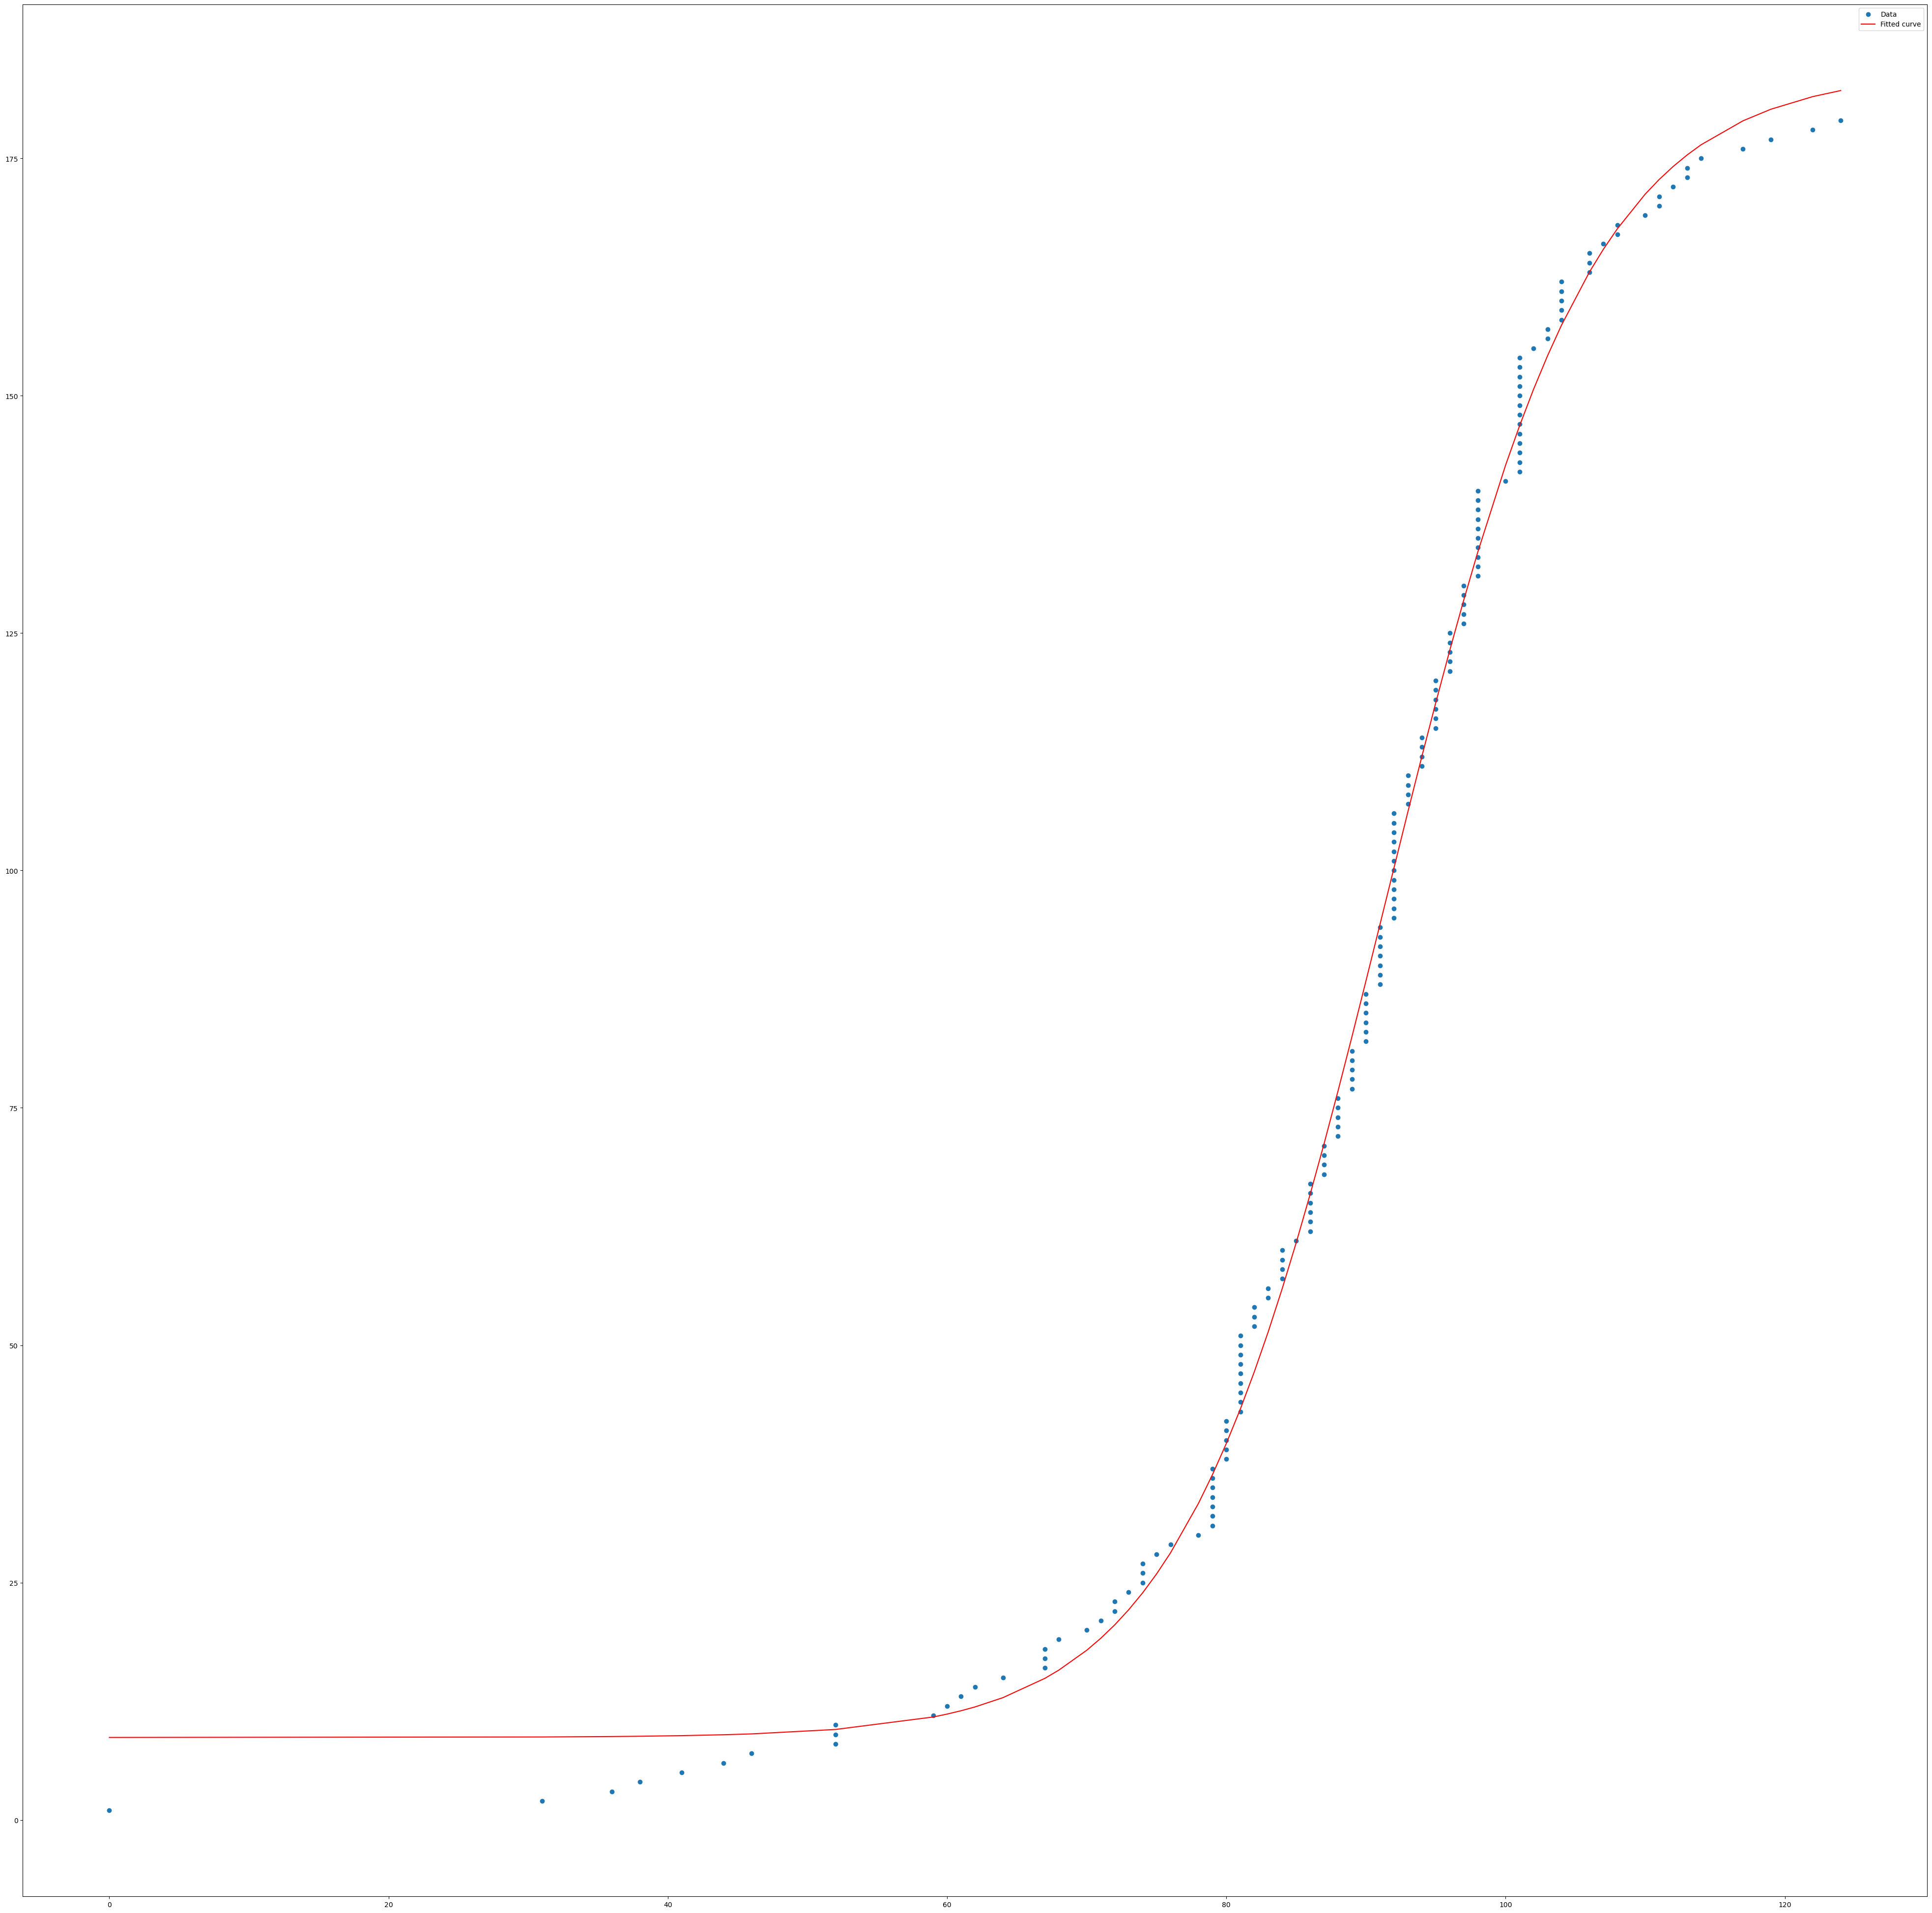

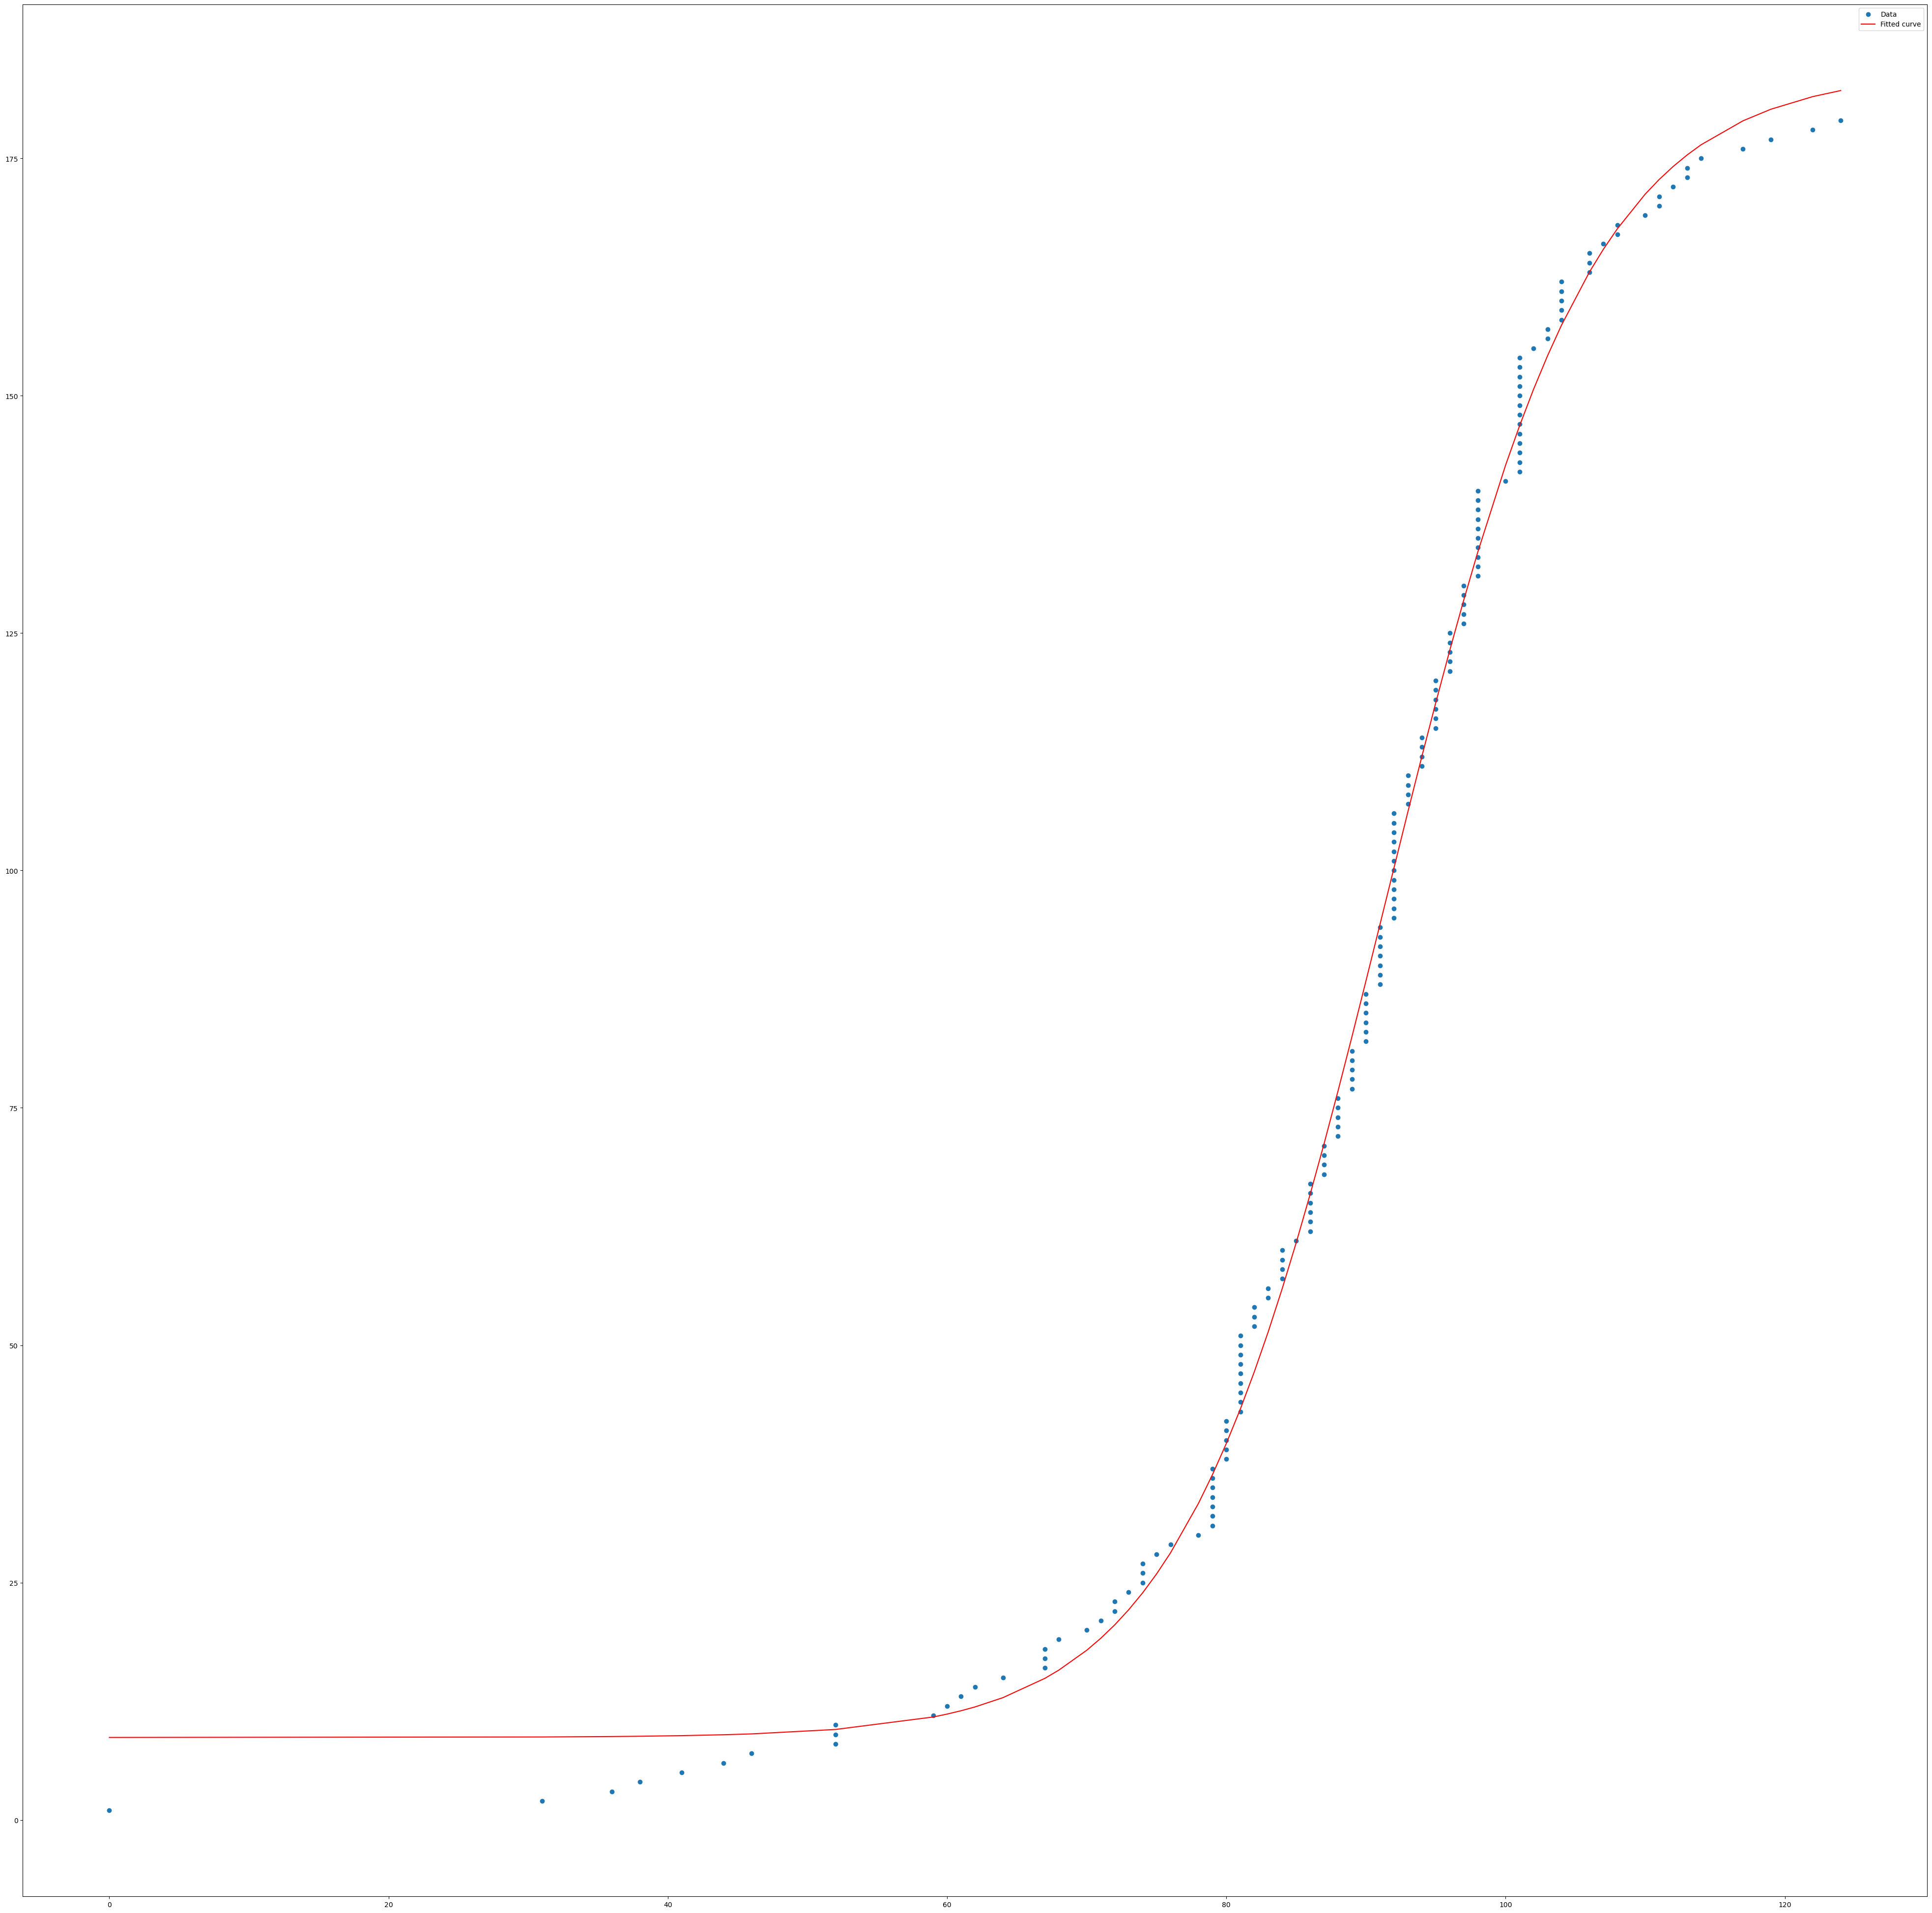

KeyboardInterrupt: 

In [9]:
log_curve_dict = {}

for species in master_sequence_nn['species_name'].unique():
    bemisia_df = master_sequence_nn[master_sequence_nn['species_name'] == 'Bemisia tabaci']

    from scipy.optimize import curve_fit
    %matplotlib inline
    plt.figure()

    time=bemisia_df['t_after_first_recorded_invasion']
    num_inv=bemisia_df['num_invasions']

    def logcurve(x, a, b, c, d):
        """
        Logistic function with parameters a, b, c, d
        a is the curve's maximum value
        b is an offset value
        c is the logistic growth rate or steepness of the curve
        d is the x value of the sigmoid's midpoint
        """
        return a / (1. + np.exp(-c * (x - d))) + b

    x = np.arange(0, len(num_inv))
    #fit logistic curve to data num_inv and time
    popt, pcov = curve_fit(logcurve, time, num_inv, p0=[max(num_inv) , 0, 0.1, 20], maxfev=100000)
    #plot data and fitted curve
    plt.scatter(time, num_inv, label='Data')
    plt.plot(time, logcurve(time, *popt), 'r-', label='Fitted curve')
    plt.legend(loc='best')
    #increase plot size
    plt.rcParams["figure.figsize"] = (50,50)

    plt.show()